## Examples of using the Mondrian forest and tree classifiers (not online versions).

In [1]:
include("../src/Mondrian_Forest_Classifier.jl")

show_mondrian_split_2d (generic function with 1 method)

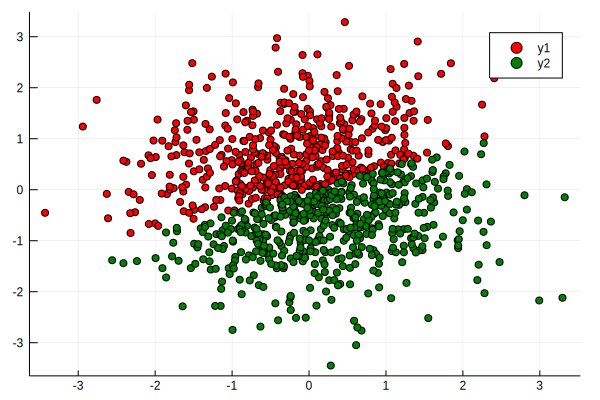

In [2]:
using MLBase
using Plots

X, Y, x, y = FakedataClassif(1000,2,1000);
Y = Y.+1;
y = y.+1;

if size(X,2)==2
    scatter(X[Y.==1,1],X[Y.==1,2], color="red")
    scatter!(X[Y.==2,1],X[Y.==2,2],color="green")
end

## Mondrian tree classifier

In [3]:
# initialise a mondreian tree classifier object with an empty tree
# and empty data. NB the underlying mondrian tree can be accessed by MT.Tree (see visualisation)
MT = Mondrian_Tree_Classifier()
# trains the tree and sets MT.X and MT.Y to the given training data
train!(MT,X,Y,1e9)

# predict on training and testing
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))
pred=predict!(MT, x)
println("Accuracy") 
println(correctrate(y,convert(Array{Int,1},pred)))

# give the raw probs
predict_proba!(MT,x[1:10,:])

Train Accuracy
0.965
Accuracy
0.956


10-element Array{Any,1}:
 [1.0, 0.0]          
 [0.193548, 0.806452]
 [1.0, 0.0]          
 [0.0, 1.0]          
 [0.75, 0.25]        
 [1.0, 0.0]          
 [0.0, 1.0]          
 [0.0, 1.0]          
 [0.0, 1.0]          
 [0.0, 1.0]          

In [4]:
# the data has been added
println(MT.X[1:10,:])
println(MT.Y[1:10])

[1.74062 -0.920041; -1.0056 0.579853; -1.4073 -0.756147; -0.0749613 -1.21099; -1.9947 -1.34122; -0.657379 -1.01696; 0.204096 -0.320918; 0.964344 0.944235; -1.00137 -0.606496; 1.77606 0.323287]
[2, 1, 2, 2, 2, 2, 2, 1, 2, 2]


## Visualisation

Based on DecisionTree.jl print_tree function. TODO draw with Graphs.jl

In [5]:
MT = Mondrian_Tree_Classifier()
# low λ value to show the plotting
train!(MT,X,Y,0.6)
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))

# print the text based vis
print_mondrian_tree(get(MT.Tree.root))

Train Accuracy
0.894
τ: 0.061
L-> τ: 0.21
    L-> τ: 0.528
        L-> Prediction: [0.4, 0.6]
        R-> Prediction: [0.028, 0.972]
    R-> Prediction: [0.0, 1.0]
R-> τ: 0.112
    L-> τ: 0.389
        L-> τ: 0.49
            L-> Prediction: [0.996, 0.004]
            R-> τ: 0.584
                L-> Prediction: [0.312, 0.688]
                R-> Prediction: [0.043, 0.957]
        R-> Prediction: [0.003, 0.997]
    R-> τ: 0.162
        L-> Prediction: [1.0, 0.0]
        R-> τ: 0.382
            L-> Prediction: [0.685, 0.315]
            R-> Prediction: [1.0, 0.0]


### The splits can be visualised for an individual Mondrian_Tree_Classifier

Here a plot and animation are returned, plot is the final still. If animation=false
then a one frame animation and plot are returned (both the final plot).

In [6]:
X, Y, x, y = FakedataClassif(100,2,25);
Y = Y.+1;
y = y.+1;

MT = Mondrian_Tree_Classifier()
train!(MT,X,Y,1e6)
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))

# plots the splits for a Mondrian_Tree_Classifier in 2_d could do
# higher d but would only plot dimension 1,2
f,a = show_mondrian_split_2d(MT,Data=true,animation=true);
gif(a,"../resources/MT.gif",fps=1)

Train Accuracy
0.95


INFO: Saved animation to /home/harvey/Group Project/Mondrian/resources/MT.gif


Plots.AnimatedGif("/home/harvey/Group Project/Mondrian/resources/MT.gif")

# Mondrian Forest classifier

Python has $\sim 27 - 33$ seconds runtime, $\sim 276-619$ MiB of memory allocations, and about $0.8-0.92$ accuracy on an
equivalent problem

See [python comparison](comparisons/python_comp.ipynb) and the plots below. S


![alt text](comparisons/n_tree_scale.png)

Yet to update data scale with paused mondrians and parallel training

![alt text](comparisons/n_data_scale.png)

In [7]:
X, Y, x, y = FakedataClassif(1000,5,100);
Y = Y.+1;
y = y.+1;

# creates a mondrian forest classifier with 100 mondrian tree classifiers
MF = Mondrian_Forest_Classifier(100)
# time and memory separately
tic()
train!(MF, X, Y, 1e9)
toc()
# prediction is greatest time hog
tic()
pred=predict!(MF, X);
toc()
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))
pred=predict!(MF, x)
println("Accuracy") 
println(correctrate(y,convert(Array{Int,1},pred)))

MF = Mondrian_Forest_Classifier(100)
println("Allocations: ", @allocated(train!(MF,X,Y,1e9))/1e6, " Mb")

elapsed time: 0.394657805 seconds
elapsed time: 0.580623625 seconds
Train Accuracy
0.969
Accuracy
0.92
Allocations: 0.002416 Mb


In [8]:
predict_proba!(MF,x[1:10,:])

10-element Array{Array{Float64,1},1}:
 [0.354775, 0.645225]
 [0.256622, 0.743378]
 [0.53818, 0.46182]  
 [0.799573, 0.200427]
 [0.663677, 0.336323]
 [0.46004, 0.53996]  
 [0.882333, 0.117667]
 [0.547578, 0.452422]
 [0.867802, 0.132198]
 [0.417708, 0.582292]

# MLBase Gridtune

Something is wrong here

In [9]:
d=2
X, Y, x, y = FakedataClassif(1000,d,100);
Y = Y.+1;
y = y.+1;

In [10]:
# Currently adding @parallel to the for loop in train! causes
# train! within MLBase's gridtune to be unable to modify the
# Mondrian_Forest_Classfier Trees array....
function train_for_mlbase!(MF::Mondrian_Forest_Classifier,
                X::Array{Float64,2},
                Y::Array{Int64},
                λ::Float64=1e9)

    for i in 1:MF.n_trees
        MT = Mondrian_Tree_Classifier()
        train!(MT, X, Y, λ)
        push!(MF.Trees,MT)
    end
    MF.X = X
    MF.Y = Y
end

function estfun(n_trees,λ)
    MF = Mondrian_Forest_Classifier()
    train_for_mlbase!(MF,X,Y,λ)
    return MF
end

function evalfun(MF)
    return correctrate(y, predict!(MF,x))
end

@time best_model, best_config, best_score = gridtune(estfun, 
                                               evalfun, 
                                               ("n_trees",[10,100,250,500]),
                                               ("λ",[1e1,1e2,1e4,1e8,1e16]),
                                               verbose=true
)
println("\nBest Configuration: ", best_config)
println("\nBest score: ", best_score)

[n_trees=10, λ=10.0] => 0.99
[n_trees=100, λ=10.0] => 0.98
[n_trees=250, λ=10.0] => 0.98
[n_trees=500, λ=10.0] => 1.0
[n_trees=10, λ=100.0] => 0.98
[n_trees=100, λ=100.0] => 0.99
[n_trees=250, λ=100.0] => 1.0
[n_trees=500, λ=100.0] => 0.95
[n_trees=10, λ=10000.0] => 1.0
[n_trees=100, λ=10000.0] => 0.99
[n_trees=250, λ=10000.0] => 0.97
[n_trees=500, λ=10000.0] => 0.99
[n_trees=10, λ=1.0e8] => 0.94
[n_trees=100, λ=1.0e8] => 0.99
[n_trees=250, λ=1.0e8] => 0.99
[n_trees=500, λ=1.0e8] => 1.0
[n_trees=10, λ=1.0e16] => 1.0
[n_trees=100, λ=1.0e16] => 0.98
[n_trees=250, λ=1.0e16] => 1.0
[n_trees=500, λ=1.0e16] => 0.98
  3.478483 seconds (28.72 M allocations: 872.145 MiB, 8.26% gc time)

Best Configuration: (500, 10.0)

Best score: 1.0


This benchmark is a little unbelievable... but the accuracy is still good, perhaps it is the
paused mondrians (the python does use these though) or Julia's time function is not working 

6.9236e-5
  0.000711 seconds (23.55 k allocations: 473.328 KiB)
2
3.062e-5
  0.002401 seconds (64.19 k allocations: 1.126 MiB)
4
3.6015e-5
  0.005279 seconds (155.44 k allocations: 2.606 MiB)
8
6.4407e-5
  0.012066 seconds (245.45 k allocations: 4.156 MiB, 40.28% gc time)
16
4.3973e-5
  0.014176 seconds (508.11 k allocations: 8.521 MiB)
32
3.9938e-5
  0.034560 seconds (1.02 M allocations: 17.072 MiB, 11.00% gc time)
64
4.2213e-5
  0.067757 seconds (2.10 M allocations: 34.959 MiB, 12.46% gc time)
128
3.7462e-5
  0.130059 seconds (4.31 M allocations: 71.493 MiB, 10.04% gc time)
256
3.6821e-5
  0.248246 seconds (8.45 M allocations: 140.209 MiB, 6.75% gc time)
512
Any[6.9236e-5, 3.062e-5, 3.6015e-5, 6.4407e-5, 4.3973e-5, 3.9938e-5, 4.2213e-5, 3.7462e-5, 3.6821e-5]
Any[0.63, 0.75, 0.81, 0.94, 0.91, 0.9, 0.91, 0.89, 0.92]


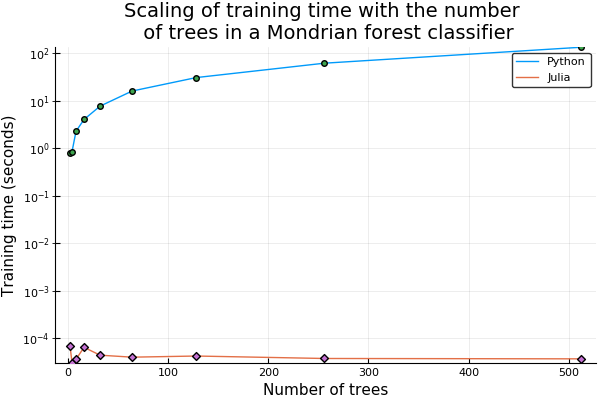

In [13]:
d=5
X, Y, x, y = FakedataClassif(1000,d,100);
Y = Y.+1;
y = y.+1;

time = []
acc = []
trees = []
for j in collect(1:9)
    push!(trees,2^j)
    MF = Mondrian_Forest_Classifier(2^j)
    tic()
    train!(MF,X,Y,1e9)
    t = toq()
    println(t)
    push!(time,t)
    @time pred=predict!(MF, x);
    push!(acc,correctrate(y,convert(Array{Int,1},pred)))
    println(MF.n_trees)
end

println(time)
println(acc)

using CSV
times_py = convert(Array{Float64,1},CSV.read("../comparisons/times_py")[2])
pyplot()

plot(trees,times_py,label="Python", yscale=:log10)
plot!(trees,time,label="Julia", yscale=:log10)
scatter!(trees,times_py,label="")
scatter!(trees,time,label="",markershape=:auto)
title!("Scaling of training time with the number \n of trees in a Mondrian forest classifier")
xlabel!("Number of trees")
ylabel!("Training time (seconds)")